In [1]:
import gym
import logging
from d4rl.pointmaze import waypoint_controller
from d4rl.pointmaze import maze_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import h5py
import argparse
import os
import sys

sys.path.append('/root/diffuser_chain_hd/')

import diffuser


No module named 'flow'
/usr/local/lib/python3.8/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
pybullet build time: Nov 28 2023 23:51:11


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xd . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

numpy.core.multiarray failed to import


In [2]:
env_name = 'maze2d-xxlarge-v3'
env = gym.make(env_name)

[8, 1]


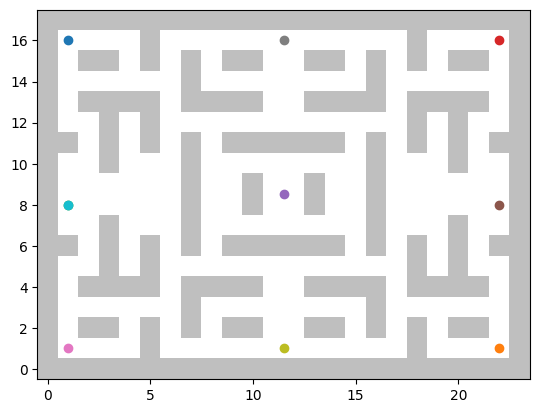

In [6]:
_background = env.maze_arr == 10 

# Plot environment background
plt.imshow(
    _background * 0.5,
    cmap=plt.cm.binary,
    vmin=0,
    vmax=1,
    origin='lower',
    alpha=0.5,
)

# def set_target(self, target_location=None):
#     if target_location is None:
#         idx = self.np_random.choice(len(self.empty_and_goal_locations))
#         reset_location = np.array(self.empty_and_goal_locations[idx]).astype(self.observation_space.dtype)
#         target_location = reset_location + self.np_random.uniform(low=-.1, high=.1, size=self.model.nq)
#     self._target = target_location
targets = [[16,1], [1,22], [8,1], [16,22], [8.5,11.5], [8, 22], [1,1], [16, 11.5], [1, 11.5]]

env.set_target(targets[2])
env.reset()


for t in targets:
    plt.scatter(t[1], t[0])

t = env.get_target()
print(t)
plt.scatter(t[1], t[0])


In [7]:
np.random.randint(2)

0

In [5]:
ds = env.get_dataset()

load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 19.15it/s]


In [6]:
obs = ds['observations']


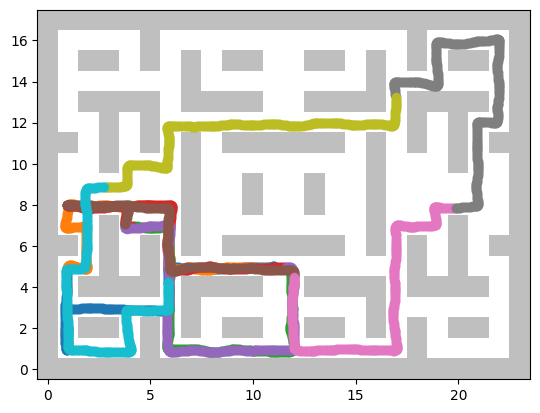

In [23]:
# for i in range(100):
#     st = np.random.randint(0, len(obs)-500)

_background = env.maze_arr == 10 

# Plot environment background
plt.imshow(
    _background * 0.5,
    cmap=plt.cm.binary,
    vmin=0,
    vmax=1,
    origin='lower',
    alpha=0.5,
)
_len = 500
for i in range(10):
    plt.scatter(obs[i*_len:i*_len+_len, 1], obs[i*_len:i*_len+_len, 0], alpha=0.7)